# Super Tic Tac Toe with DQN and PPO Algorithm

### YI, Jiahe: 21104550       $\qquad$ ZHANG, Ruiyi: 21107100

## 1. Introduction
The rapid advancement of reinforcement learning (RL) has enabled remarkable progress in sovling complex **sequential decision-making problems**, particularly in **game enviroments**. This report explores the application of two prominent RL algorithms--**Deep Q-Network (DQN)** and **Proximal Policy Optimization (PPO)**--to train an agent for *SuperTicTacToe*, a specialized variant of Gomoku with upique rule. SuperTicTacToe introduces additional strategic complexity compared to traditional tic-tac-toe, similar to tic-tac-toe but requires 4 in a row/column or 5 diagonally to win. Played on a cross-shaped board with five 4x4 grids. Players take turns placing pieces, with a 50% chance to place at the chosen spot. If failed, the system randomly selects from 8 adjacent squares (ignoring boundaries). Invalid selections (e.g., 5/16 chance at corners to pick off-board) forfeit the turn.

The primary objective of this study is to evaluate **the effectiveness of DQN and PPO in mastering SuperTicTacToe under predefined rules**. For the **DQN**, we developed all components—including the Q-network, experience replay buffer, and ε-greedy exploration strategy—from scratch **using TensorFlow’s deep learning framework**. This custom-built approach allowed fine-grained control over hyperparameters and reward function integration. In contrast, the **PPO implementation** leveraged **TorchRL, a PyTorch-based RL library analogous to TensorFlow’s TF-Agents**, to streamline policy and value network training. The SuperTicTacToe environment was adapted to TorchRL’s interface, enabling efficient parallelized sampling and gradient updates while maintaining compatibility with the game’s rule constraints.

Experiments focus on key metrics such as **training episodes vs win rate**, **policy evolution visualization**, **loss dynamics**, and **reward function sensitivity analysis**, supplemented by visualizations of game trajectories and training dynamics. The findings provide insights into algorithmic adaptability, training efficiency, and practical considerations for deploying RL agents in rule-constrained game environments.




## 2. Overview of the report

The report is structured into two main sections, each dedicated to analyzing DQN and PPO algorithms in the context of SuperTicTacToe:<br>

### I. Deep Q-Network Algorithm
#### Part 1. Algorithm Analysis
Theoretical foundations of DQN, including exploration-exploitation balance ($\epsilon$-greedy) and experience replay.<br>
#### Part 2. Code Display

1. **Game Environment Class**: `SuperTicTacToe`<br>
A custom Super Tic-Tac-Toe environment managing 12x12 cross-shaped board dynamics, state transitions, and win/draw condition checks.<br>
2. **DQN Agent Class**: `DQNAgent`<br>
A deep Q-learning agent implementation with experience replay buffer, target network synchronization, and ε-greedy exploration.<br>
3. **Training Function**: `train_agent`<br>
Orchestrates the DQN training loop by interacting with the environment and optimizing policy through experience replay.<br>
4. **Evaluation Function**: `evaluate_agent`<br>
Quantitatively evaluates the agent's win/loss/draw rates against a random baseline player.<br>

#### Part 3. Experiments & Results
1. **Training Episodes vs Win Rate**<br>
The first experiment demonstrates the agent's win rate against a random player across varying training episodes, showing a steady performance improvement as training progresses, confirming progressive strategy refinement.<br>
2. **Policy Evolution Visualization**<br>
The second experiment compares board states and move sequences at episodes 10/50/200/400. As training intensifies, strategic patterns (offensive strikes, blocking maneuvers, defensive formations) become increasingly pronounced.<br>
3. **Loss Dynamics**<br>
The third experiment tracks loss values during training, revealing an initial exploration-phase peak followed by rapid decline and convergence, illustrating the algorithm's natural transition from exploration to exploitation.<br>
4. **Reward Function Sensitivity**<br>
The final experiment modifies reward parameters, exposing how incentive designs controllably shape strategic preferences (aggressive attacks vs conservative defenses).<br>
### II. Proximal Policy Optimization
#### Part 1. Algorithm Analysis
Theoretical foundations of PPO, including objective loss function, GAE, etc.
#### Part 2. Code Display
1. **Environment Component**: Class `SuperTicTacToe`<br>
The `SuperTicTacToe` class governs 12x12 cross-shaped board dynamics, including state transitions, move validation, and win/draw condition checks.<br>
2. **Agent Component**: Class `ActorNet` and `ValueNet`<br>
`ActorNet` generates action probability distributions, while `ValueNet` estimates state values, forming the core of the Actor-Critic architecture.<br>
3. **Training Pipline**: Method `train`<br>
The `train` method orchestrates the end-to-end training loop, integrating environment interaction, experience replay sampling, network updates, and target synchronization.<br>
#### Part 3. Experiments & Results
1. **Hyperparameter Space**<br>
2. **Result Analysis**<br>

## I. Deep Q-Network Algorithm

### Part 1. Algorithm Analysis

**1. Mathematical Foundation**

- **Q-Learning Update Rule**  
  $$Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right]$$  
  Where:  
  - \( s \): Current state (e.g., board configuration in a game)  
  - \( a \): Action (e.g., valid move or placement)  
  - \( $\alpha$ \): Learning rate (e.g., 0.001)  
  - \( $\gamma$ \): Discount factor (e.g., 0.95)

- **Bellman Target (Optimal Q-Value Estimation)**  
  $$y = r + \gamma \max_{a'} Q(s',a)$$  
  The target Q-value is computed by selecting the maximum Q-value over all possible actions \( $a'$ \) in the next state \( $s'$ \).

- **DQN Loss Function**  
  $$L(\theta) = \mathbb{E}\left[ \left( y - Q(s,a;\theta) \right)^2 \right]$$  
  The goal is to minimize the squared error between the predicted Q-value, \( $Q(s,a;\theta)$ \), and the target Q-value \( $y$ \).

**2. Training Stability Strategies**

- **Experience Replay**  
  In DQN, experience replay is used to store the agent’s transitions \((s, a, r, s')\) in a buffer. During training, a random sample of experiences from the buffer is used for updates. This helps break the correlation between consecutive experiences, improving data diversity and stabilizing the training process.

- **Target Network**  
  A separate target network \( $\theta^-$ \) is used to compute the target Q-values. The target network is updated less frequently (typically every \( $C$ \) steps) or gradually through soft updates:  
  $$\theta^- \leftarrow \tau \theta + (1 - \tau)\theta^-$$  
  By keeping the target network fixed for several steps, DQN avoids harmful feedback loops and helps stabilize the learning process.

- **Overestimation Bias**  
  DQN uses the \( $\max$ \) operator to select the action that maximizes the Q-value. However, this can lead to overestimation bias because the same Q-values are used both to select and evaluate actions. Despite this bias, DQN still performs well in many settings, especially due to the stabilizing effects of experience replay and the target network.


### Part 2. Code Display

The code mainly consists of four parts:

1. **Game Environment Class**: `SuperTicTacToe`
We first introduce how to construct the MDP environment for the Super Tic-Tac-Toe problem. Remarkably,
2. **DQN Agent Class**: `DQNAgent`
3. **Training Function**: `train_agent`
4. **Evaluation Function**: `evaluate_agent`

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from collections import deque
import os
from IPython.display import Image

#### 1. `Class SuperTicTacToe`

#### **a. Key Attributes**
| Attribute        | Description                                                                                                   |
|------------------|----------------------------------------------------------------------------------------------------------------------------|
| **board_size**   | Defines the size of the board (12x12 grid). The total size of the board is 12x12, and some positions are outside the playable area. The board itself is larger, but only certain positions are valid for play. |
| **valid_positions** | A set of valid positions where players can make moves. This set defines the cross-shaped region on the board where the game is played, consisting of five 4x4 squares. |
| **board**        | A 2D NumPy array representing the game board. The values are as follows: <br> `0` = empty <br> `1` = player 1 (O) <br> `2` = player 2 (X) |
| **current_player** | Indicates which player's turn it is. `1` refers to player 1 (O), and `2` refers to player 2 (X). |
| **done**         | A boolean flag indicating whether the game is finished (either a win, draw, or the game has ended). |
| **winner**       | The winner of the game. If the game is still ongoing, the value is `None`. <br> `1` = player 1 (O) wins <br> `2` = player 2 (X) wins <br> `0` = draw |
| **last_move**    | The coordinates of the last move made on the board. This helps to track the most recent action taken. |
| **total_moves**  | Tracks the total number of moves made during the game. |


#### **b. Key Methods**

| Category                        | Method Name                                             | Description                                                                                                     |
|----------------------------------|---------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| **Initialization Methods**       | **`__init__()`**                                             | Initializes the game state, including the board size, valid positions, and initial player setup. The board is initially empty. |
|                                  | **`init_valid_positions()`**                                 | Initializes the set of valid positions, which form a cross-shaped region on the board. This defines where players can place their pieces. |
|                                  | **`is_valid_position(position)`**                           | Checks if a given position is part of the valid playable area.                                                              |
|                                  | **`is_empty(position)`**                                     | Checks whether a specified position on the board is empty.                                                                  |
| **Game Logic Methods**           | **`make_move(position)`**                                    | Attempts to place a piece at the given position for the current player. If the position is invalid or already occupied, the move fails. The method also randomly chooses an adjacent position if the initial one is invalid. |
|                                  | **`check_game_status()`**                                    | Evaluates the board to determine if there is a winner (4 in a row/column or 5 in a diagonal). It also checks if the game has ended in a draw. |
|                                  | **`get_adjacent_positions(position)`**                       | Returns a list of valid adjacent positions around the specified position.                                                    |
| **State Retrieval Methods**      | **`get_state()`**                                            | Converts the current board into a 3D NumPy array, with each channel representing: Player 1’s positions (O), Player 2’s positions (X), and Valid positions (where players can move). |
| **Auxiliary Methods**            | **`reset()`**                                                | Resets the board and game state to the initial conditions, clearing the board and preparing for a new game.                 |
|                                  | **`render(action_list, mode="no_order")`**                   | Displays the current board in the console, optionally showing the order of moves.                                           |
|                                  | **`step(action)`**                                           | Executes an action (placing a piece at a position), updates the board, and returns the new state, reward, and a flag indicating whether the game is over. |
|                                  | **`get_winner()`**                                           | Returns the winner of the game (1 for player 1, 2 for player 2, and 0 for a draw).                                           |


#### **c. Key Design Details**

##### 🎮 `make_move` Function Summary

- **Key Process Flow**  
1. **Pre-Check Validation**  
   - Returns `False` immediately if the target position is invalid or occupied.

2. **Move Execution**  
   - **50% chance** to place the piece at the selected position  
   - **50% chance** to randomly select a valid adjacent position (8 adjacent directions including diagonals)

3. **Post-Success Actions**  
   - Increments `total_moves` counter  
   - Triggers game status check (win/draw detection)  
   - Switches active player (`current_player = 3 - original_player`)  

- **Critical Features**  
| Feature                | Significance                          |
|------------------------|---------------------------------------|
| Probabilistic Displacement | Adds strategic uncertainty to moves  |
| Adjacent Position Pool | 8-direction neighborhood evaluation   |
| State Update Control   | Only updates game status after valid moves |


##### 🏆 `reward` Function Summary (Logic in `step` Method)

| Reward Type            | Value Range | Trigger Condition                 | Design Purpose               |
|------------------------|-------------|------------------------------------|------------------------------|
| Invalid Move Penalty   | -1.0        | Attempting illegal placement      | Discourage invalid attempts  |
| Base Move Reward       | +0.1        | Successful move completion        | Encourage participation      |
| Victory Reward         | +10.0       | Achieving 4-in-a-row/5-diagonal   | Reinforce win conditions     |
| Loss Penalty           | -5.0        | The opposite sides wins           | Reinforce win conditions     |
| Draw Reward            | +1.0        | Board filled with no winner       | Balance draw strategies      |
| Quick Victory Bonus    | ×1.2        | Winning in <12 total moves        | Incentivize efficient play   |
| Center Zone Bonus      | +0.3        | Placing in 4x4 center area        | Encourage board control      |


In [8]:
# Define game environment
class SuperTicTacToe:
    def __init__(self):
        # Define board: 0 = empty, 1 = player 1 (O), 2 = player 2 (X)
        # Create a cross-shaped board with 5 squares of 4x4 size
        # Total board size is 12x12 with some positions being outside the game
        self.board_size = 12
        self.valid_positions = set()
        self.init_valid_positions()
        self.board = np.zeros((self.board_size, self.board_size), dtype=np.int32)
        self.current_player = 1
        self.done = False
        self.winner = None
        self.last_move = None
        self.total_moves = 0
        
    def init_valid_positions(self):
        # Create the cross-shaped board
        # Central 4x4 square
        central_x, central_y = 4, 4
        for i in range(central_x, central_x + 4):
            for j in range(central_y, central_y + 4):
                self.valid_positions.add((i, j))
        
        # Left 4x4 square
        left_x, left_y = 4, 0
        for i in range(left_x, left_x + 4):
            for j in range(left_y, left_y + 4):
                self.valid_positions.add((i, j))
                
        # Top 4x4 square
        top_x, top_y = 0, 4
        for i in range(top_x, top_x + 4):
            for j in range(top_y, top_y + 4):
                self.valid_positions.add((i, j))
                
        # Right 4x4 square
        right_x, right_y = 4, 8
        for i in range(right_x, right_x + 4):
            for j in range(right_y, right_y + 4):
                self.valid_positions.add((i, j))
                
        # Bottom 4x4 square
        bottom_x, bottom_y = 8, 4
        for i in range(bottom_x, bottom_x + 4):
            for j in range(bottom_y, bottom_y + 4):
                self.valid_positions.add((i, j))
    def is_valid_position(self, position):
        return position in self.valid_positions
    
    def is_empty(self, position):
        i, j = position
        if not self.is_valid_position(position):
            return False
        return self.board[i][j] == 0
    
    def get_valid_moves(self):
        valid_moves = []
        for position in self.valid_positions:
            if self.is_empty(position):
                valid_moves.append(position)
        return valid_moves
    
    def get_adjacent_positions(self, position):
        i, j = position
        adjacent = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue
                new_i, new_j = i + di, j + dj
                if 0 <= new_i < self.board_size and 0 <= new_j < self.board_size:
                    adjacent.append((new_i, new_j))
        return adjacent

    def make_move(self, position):
        i, j = position
        
        if not self.is_valid_position(position) or not self.is_empty(position):
            return False  
    
        success = False  
        original_player = self.current_player  
        
        if random.random() < 0.5:
            self.board[i][j] = self.current_player
            self.last_move = (i, j)
            success = True
        else:
            adjacent = [
                (x, y) for x, y in self.get_adjacent_positions(position) 
                if self.is_valid_position((x, y))
            ]
            
            if adjacent:
                random_position = random.choice(adjacent)
                rx, ry = random_position
                if self.is_empty(random_position):
                    self.board[rx][ry] = self.current_player
                    self.last_move = (rx, ry)
                    success = True
    
        if success:
            self.total_moves += 1
            self.check_game_status() 
            
            self.current_player = 3 - original_player  
        else:
            self.last_move = None
            
        return success  

    def check_game_status(self):
        # Check for a winner (4 in a row/column or 5 in a diagonal)
        for player in [1, 2]:
            # Check rows
            for i in range(self.board_size - 3):
                for j in range(self.board_size):
                    if all(self.board[i+k][j] == player for k in range(4)):
                        self.done = True
                        self.winner = player
                        return
            
            # Check columns
            for i in range(self.board_size):
                for j in range(self.board_size - 3):
                    if all(self.board[i][j+k] == player for k in range(4)):
                        self.done = True
                        self.winner = player
                        return
            
            # Check diagonals (top-left to bottom-right)
            for i in range(self.board_size - 4):
                for j in range(self.board_size - 4):
                    if all(self.board[i+k][j+k] == player for k in range(5)):
                        self.done = True
                        self.winner = player
                        return
            
            # Check diagonals (top-right to bottom-left)
            for i in range(self.board_size - 4):
                for j in range(4, self.board_size):
                    if all(self.board[i+k][j-k] == player for k in range(5)):
                        self.done = True
                        self.winner = player
                        return
        
        # Check for a draw
        if not any(self.is_empty(pos) for pos in self.valid_positions):
            self.done = True
            self.winner = 0  # Draw

    def reset(self):
        self.board = np.zeros((self.board_size, self.board_size), dtype=np.int32)
        self.current_player = 1
        self.done = False
        self.winner = None
        self.last_move = None
        self.total_moves = 0
        self._cached_state = None
        return self.get_state()
    
    def get_state(self):
        # Convert the board to a flat array representation
        state = np.zeros((self.board_size, self.board_size, 3), dtype=np.float32)
        
        # Channel 0: Player 1's pieces
        state[:, :, 0] = (self.board == 1).astype(float)
        
        # Channel 1: Player 2's pieces
        state[:, :, 1] = (self.board == 2).astype(float)
        
        # Channel 2: Valid positions (1 if valid, 0 if invalid)
        for i in range(self.board_size):
            for j in range(self.board_size):
                state[i, j, 2] = 1.0 if (i, j) in self.valid_positions else 0.0
        
        return state

    def step(self, action):
        """
        Takes an action and returns the new state, reward, done flag
        Action is a tuple (i, j) representing the position to place the piece
        """
        try:
            i, j = action
        except (TypeError, ValueError):
            i, j = 0, 0 
        
        prev_player = self.current_player
        
        success = self.make_move((i, j))
        
        if not success:
            reward = -1.0
            
            if not self.get_valid_moves():
                self.done = True
                self.winner = 0  
                reward = 0.0  
                
            return self.get_state(), reward, self.done
        
        reward = 0.1  
        
        if self.done:
            if self.winner == 1:
                reward = 10.0 if prev_player == 1 else -5.0
            elif self.winner == 2:
                reward = 10.0 if prev_player == 2 else -5.0
            else:  
                reward = 1.0  
                
            if self.total_moves < 12:  
                reward *= 1.3
        else:
            center_zone = {(x,y) for x in range(4,8) for y in range(4,8)}
            if (i,j) in center_zone:
                reward += 0.5
        
        return self.get_state(), reward, self.done
        
    def render(self, action_list, mode="no_order"):
        """Render the game board"""
        symbols = {0: ' ', 1: 'O', 2: 'X'}
        if mode == "with_order":
            for i in range(self.board_size):
                row = []
                for j in range(self.board_size):
                    if (i, j) in self.valid_positions:
                        index = -1
                        if (i, j) in action_list:
                            index = action_list.index((i, j))
                        if 0 <= index < 10:
                            row.append(f" {index} {symbols[self.board[i][j]]}")
                        elif index == -1:
                            row.append(f"   {symbols[self.board[i][j]]}")
                        else:
                            row.append(f"{index} {symbols[self.board[i][j]]}")
                    else:
                        row.append('    ')
                print('|' + '|'.join(row) + '|')
            print("\n")
        elif mode == "no_order":
            for i in range(self.board_size):
                row = []
                for j in range(self.board_size):
                    if (i, j) in self.valid_positions:
                        row.append(symbols[self.board[i][j]])
                    else:
                        row.append(' ')
                print('|' + '|'.join(row) + '|')
            print("\n")
        
    def get_winner(self):
        return self.winner
        

#### 2. `Class DQNAgent`

#### **a. Key Attributes**
| Attribute       | Description                                                                                           |
|---------------------|-------------------------------------------------------------------------------------------------------|
| **state_shape**      | Defines the shape of the input state, such as the dimensions of the game board or environment.        |
| **action_size**      | Specifies the number of possible actions the agent can take, based on the environment's action space.  |
| **memory**           | A deque used for storing past experiences. It stores tuples of (state, action, reward, next_state, done). |
| **gamma**            | The discount factor for future rewards in Q-learning. Typically between 0 and 1.                       |
| **epsilon**          | The exploration rate in the epsilon-greedy strategy, controlling how often the agent explores randomly. |
| **epsilon_min**      | The minimum value that epsilon can reach, ensuring occasional exploration even after training.        |
| **epsilon_decay**    | The rate at which epsilon decays after each episode, transitioning the agent from exploration to exploitation. |
| **learning_rate**    | The learning rate used by the optimizer (Adam) to update the model during training.                   |
| **model**            | The neural network model used for approximating Q-values based on the state.                          |
| **target_model**     | A target model used to calculate the target Q-values during training, updated periodically.           |


#### **b. Key Methods**
| Method                        | Description                                                                                           |
|------------------------------------|-------------------------------------------------------------------------------------------------------|
| **`__init__(state_shape, action_size)`** | Initializes the agent, setting up the state shape, action size, memory, and hyperparameters. Builds the main model and target model. |
| **`_build_model()`**               | Builds a neural network model to approximate Q-values for each action given a state.                  |
| **`update_target_model()`**        | Copies weights from the main model to the target model to ensure stable training.                     |
| **`remember(state, action, reward, next_state, done)`** | Stores the agent’s experience in memory for experience replay.                                      |
| **`act(state, valid_moves)`**      | Selects an action based on epsilon-greedy strategy: exploration or exploitation based on the current epsilon value. |
| **`replay(batch_size)`**           | Samples a batch from memory, computes target Q-values, and updates the model using the Adam optimizer. |
| **`load(name)`**                  | Loads the model's weights from a file, allowing the agent to resume training from a saved state.       |
| **`save(name)`**                  | Saves the model's weights to a file, ensuring the filename ends with `.weights.h5`.                   |


#### **c. Key Design Details** 

**1. Neural Network Architecture**

   The code shown below represent the network structure for the deep Q-Network for our problem.
```python
model = tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(12,12,3)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(144)])
```
| **Component**     | **Functionality**                                      |
|-------------------|--------------------------------------------------------|
| **Conv Layer 1**  | 64x3x3 kernels, extracts local patterns               |
| **Conv Layer 2**  | 128x3x3 kernels, captures tactical features           |
| **Dense Layer**   | Maps spatial features to action space                 |
| **Output Layer**  | 144 outputs for all board positions                   |

**2. Experience Replay Mechanism**
```python
self.memory = deque(maxlen=2000)
```
**Operational Flow:**

- Experience Storage

Format: ``(state, action, reward, next_state, done)``

- Batch Sampling

Randomly select batch_size experiences to break correlations.

- Q-value Update
  
Target network computes future rewards.

Current network updated via Mean Squared Error (MSE) loss.
   



**3. Action Selection Strategy**
```python
def act(self, state, valid_moves):
    if np.random.rand() <= self.epsilon:  # Exploration
        return random.choice(valid_moves)
    else:                                 # Exploitation
        mask = ...  # Invalidate illegal moves
        return np.argmax(Q_values + mask)
```

| **Strategy Element**   | **Parameter/Behavior**                             |
|------------------------|---------------------------------------------------|
| **ε-Greedy Decay**      | ε=1.0 → 0.995 decay/step → min=0.01              |
| **Action Masking**      | Forces valid move selection                       |
| **Validity Guarantee**  | Dynamic filtering via `valid_moves`              |

In [9]:
# Define DQN Agent
class DQNAgent:
    def __init__(self, state_shape, action_size):
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=self.state_shape))  # ✅ 显式声明输入层
        model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))  # 移除input_shape
        #model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=self.state_shape))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        # Copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state, valid_moves):
        if np.random.rand() <= self.epsilon:
            # Choose random action from valid moves
            if valid_moves:
                return random.choice(valid_moves)
            return (0, 0)  # Default move if no valid moves
        
        # Flatten the state for prediction
        state_flat = np.reshape(state, [1] + list(self.state_shape))
        act_values = self.model.predict(state_flat, verbose=0)
        
        # Create a mask for valid moves
        mask = np.ones(self.action_size) * float('-inf')
        for i, j in valid_moves:
            flat_idx = i * 12 + j  # Convert 2D to flat index
            mask[flat_idx] = 0
        
        masked_act_values = act_values + mask
        
        # Get the index of the best action
        flat_action = np.argmax(masked_act_values)
        
        # Convert flat index back to 2D coordinates
        i = flat_action // 12
        j = flat_action % 12
        return (i, j)

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        loss = 0
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            i, j = action
            flat_action = i * 12 + j  # Convert 2D to flat index
            
            state = np.reshape(state, [1] + list(self.state_shape))
            next_state = np.reshape(next_state, [1] + list(self.state_shape))
            
            target = self.model.predict(state, verbose=0)

            if done:
                target[0][flat_action] = reward
            else:
                t = self.target_model.predict(next_state, verbose=0)
                target[0][flat_action] = reward + self.gamma * np.amax(t)
            history = self.model.fit(state, target, epochs=1, verbose=0)
            loss += history.history['loss'][0]
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return loss

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        # Fix: Ensure the filename ends with .weights.h5
        if not name.endswith('.weights.h5'):
            name = name + '.weights.h5'
        self.model.save_weights(name)


#### 3. `Train Function`

The following flowchart illustrates the execution logic of the training function.

In [31]:
from IPython.display import HTML
HTML("<div style='text-align:center'><img src='pics/flowchart.png' width='500'/></div>")

In [11]:
def train_agent(episodes=1000, batch_size=32, render_every=100, render_mode="no_order"):
    #########
    loss_list = []
    step_count = 0
    #########
    env = SuperTicTacToe()
    state_shape = (12, 12, 3)  # 12x12 board with 3 channels
    action_size = 12 * 12  # Flat action space (all possible board positions)
    
    agent = DQNAgent(state_shape, action_size)
    
    wins = {0: 0, 1: 0, 2: 0}  # track wins for draw, player 1, player 2
    rewards_history = []
    
    for e in range(episodes):
        loss_episode_list = []
        action_list =[]
        state = env.reset()
        total_reward = 0
        
        while not env.done:
            # Get valid moves
            valid_moves = env.get_valid_moves()
            
            # Get action
            action = agent.act(state, valid_moves)
            if env.last_move:
                action_list.append(env.last_move)
            
            # Take action
            next_state, reward, done = env.step(action)
            
            # Remember the experience
            agent.remember(state, action, reward, next_state, done)
            
            state = next_state
            total_reward += reward
            
            # Train the agent
            if len(agent.memory) > batch_size:
                #########
                step_count += 1
                loss = agent.replay(batch_size)
                loss_list.append(loss)
                #########


            if done:
                # Update target model every episode
                agent.update_target_model()
                
                winner = env.get_winner()
                wins[winner] += 1
                
                print(f"Episode: {e}/{episodes}")
                print(f"Total reward: {total_reward}")
                print(f"Epsilon: {agent.epsilon}")
                print(f"Winner: {winner}")
                print(f"Wins: P1={wins[1]}, P2={wins[2]}, Draw={wins[0]}")
                if env.last_move:
                    action_list.append(env.last_move)
                env.render(action_list, render_mode)
        
        rewards_history.append(total_reward)
        
        # Save the model every 100 episodes
        if e % 100 == 0:
            agent.save(f"super_tictactoe_model_{e}")
    plt.plot(loss_list)
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Loss per step")
    plt.show()

    
    return agent, rewards_history

#### 4. `Evaluation Function`

The `evaluate_agent` function evaluates the performance of a trained Deep Q-Network (DQN) agent against a random baseline player in the SuperTicTacToe environment. It quantifies the agent's effectiveness by tracking win/loss/draw statistics over multiple episodes. This function is critical for validating the trained model's practical gameplay capabilities.

- **Function Signature**  
```python
def evaluate_agent(agent: DQNAgent, episodes: int = 100) -> dict:
    """Evaluate the trained DQN agent against a random player.
    
    Args:
        agent: A trained DQNAgent instance to evaluate.
        episodes: Number of complete games to simulate (default=100).
    
    Returns:
        A dictionary containing win/loss/draw counts:
        {0: draws, 1: agent_wins, 2: random_player_wins}
    """

In [12]:
def evaluate_agent(agent, episodes=100):
    env = SuperTicTacToe()
    wins = {0: 0, 1: 0, 2: 0}
    
    for e in range(episodes):
        state = env.reset()
        
        while not env.done:
            valid_moves = env.get_valid_moves()
            
            # Player 1: RL agent
            if env.current_player == 1:
                action = agent.act(state, valid_moves)
                state, _, done = env.step(action)
            # Player 2: Random player
            else:
                if valid_moves:
                    action = random.choice(valid_moves)
                    state, _, done = env.step(action)
        
        winner = env.get_winner()
        wins[winner] += 1
        
        if e % 10 == 0:
            print(f"Episode: {e}/{episodes}, Winner: {winner}")
    
    print(f"Evaluation results:")
    print(f"Agent wins: {wins[1]}")
    print(f"Random player wins: {wins[2]}")
    print(f"Draws: {wins[0]}")
    
    return wins

### Part 3. Experiments & Results

Here is an example to show how we train our model and get results.

We use the parameters below to run the main function:

1. **episodes=3**: Number of episodes for training the agent. The agent will train for 3 episodes.

2. **batch_size=64**: Number of experiences used in each training step. 64 experiences are sampled for each update.


3. **render_every=1**: Controls how often the environment is rendered. The environment is rendered every 1 episode.

4. **render_mode="no_order"**: Specifies the render mode. In no_order, the move sequence is not displayed, showing only the final board state.

Episode: 0/3
Total reward: 14.5
Epsilon: 1.0
Winner: 2
Wins: P1=0, P2=1, Draw=0
|    |    |    |    |34 O|14 O|    |    |    |    |    |    |
|    |    |    |    |    |    |    |    |    |    |    |    |
|    |    |    |    | 2 O|13 X|27 X|    |    |    |    |    |
|    |    |    |    | 5 X|    |22 O|16 O|    |    |    |    |
|    | 6 O|32 O|    |    |    |30 O|12 O| 1 X|    |    |10 O|
|15 X|    |25 X|20 O|    |    | 8 O|    |29 X|    | 4 O|11 X|
|18 O|28 O|    |    |19 X|    |    |    |26 O|17 X|    |    |
|    |    |    |    |    |    |    |    |    | 9 X|    |24 O|
|    |    |    |    |    |23 X|    |33 X|    |    |    |    |
|    |    |    |    |    | 0 O|    |    |    |    |    |    |
|    |    |    |    |    | 7 X|    |    |    |    |    |    |
|    |    |    |    | 3 X|31 X|35 X|21 X|    |    |    |    |


Episode: 1/3
Total reward: 11.999999999999998
Epsilon: 0.8778091417340573
Winner: 2
Wins: P1=0, P2=2, Draw=0
|    |    |    |    |    |    |    |42 O|    |    |    |    |
|  

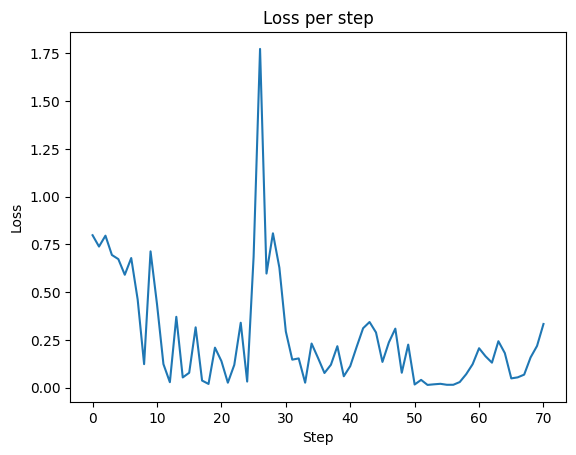

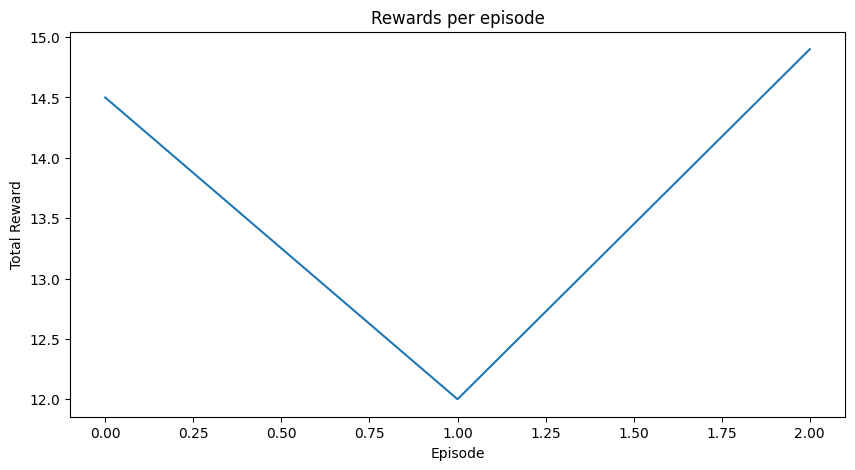

Episode: 0/100, Winner: 2
Episode: 10/100, Winner: 2
Episode: 20/100, Winner: 1
Episode: 30/100, Winner: 2
Episode: 40/100, Winner: 2
Episode: 50/100, Winner: 1
Episode: 60/100, Winner: 1
Episode: 70/100, Winner: 2
Episode: 80/100, Winner: 1
Episode: 90/100, Winner: 2
Evaluation results:
Agent wins: 53
Random player wins: 47
Draws: 0


In [8]:
# Main function
def main():
    # Train the agent
    agent, rewards_history = train_agent(episodes=3, batch_size=64, render_every=1, render_mode="with_order")
    
    # Plot the rewards
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_history)
    plt.title('Rewards per episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig('rewards.png')
    plt.show()
    
    # Evaluate the agent
    evaluate_agent(agent, episodes=100)

if __name__ == "__main__":
    main()
    

Episode: 0/3
Total reward: 12.8
Epsilon: 1.0
Winner: 1
Wins: P1=1, P2=0, Draw=0
| | | | |O|X| | | | | | |
| | | | | | |X| | | | | |
| | | | |X| | | | | | | |
| | | | |O| | | | | | | |
| | | | | | | | | | | |O|
| | | |X| | | |O|O|O|O|X|
|O| | | | |X| |X| |X|O|X|
| | |X|O|O|O| | | | |X|X|
| | | | |X| | | | | | | |
| | | | | |O| | | | | | |
| | | | |O|O| |X| | | | |
| | | | | | | | | | | | |


Episode: 1/3
Total reward: 0.29999999999999716
Epsilon: 0.7901049725470279
Winner: 1
Wins: P1=2, P2=0, Draw=0
| | | | |X| |X| | | | | |
| | | | |X|X|O|X| | | | |
| | | | |O| |X|X| | | | |
| | | | |O|O| | | | | | |
|X|X|O|O|O| |O|O| | |O|O|
| |X| |X|O|X|X| |X|O|X|O|
| |O|X|O| |O|O| |O|X|O|X|
|O| | |X| | |X|O|X|O|O| |
| | | | |O|X|X| | | | | |
| | | | |X|O|O|O| | | | |
| | | | |X|X|X| | | | | |
| | | | |X|O|O|X| | | | |


Episode: 2/3
Total reward: 13.799999999999997
Epsilon: 0.5647174463480732
Winner: 1
Wins: P1=3, P2=0, Draw=0
| | | | |X|X|O|X| | | | |
| | | | |X| |O|X| | | | |
| | | | |O|X|X|O| | |

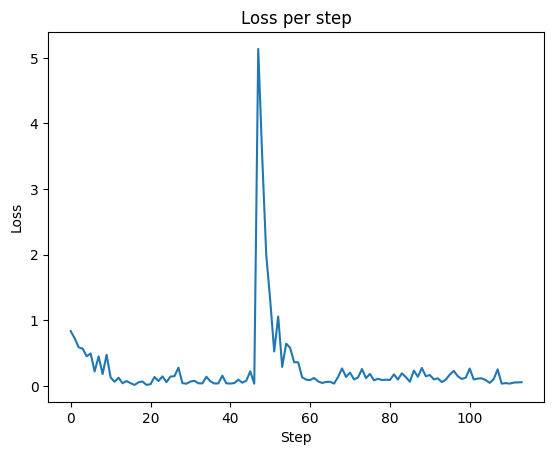

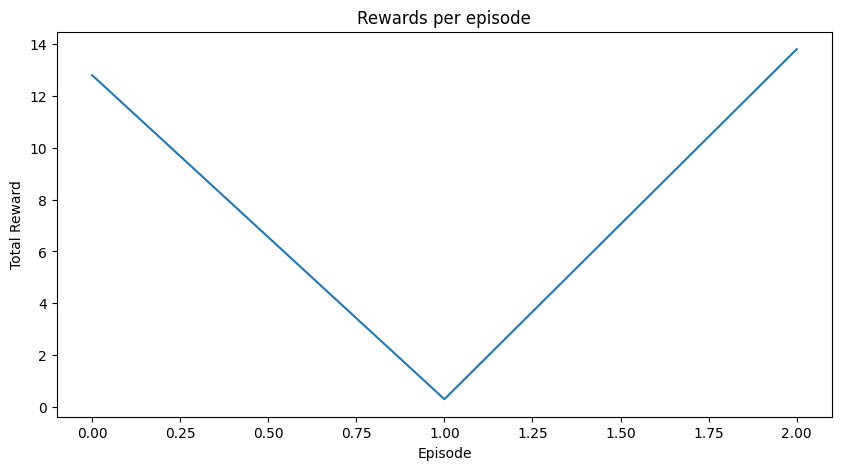

Episode: 0/100, Winner: 1
Episode: 10/100, Winner: 2
Episode: 20/100, Winner: 1
Episode: 30/100, Winner: 1
Episode: 40/100, Winner: 1
Episode: 50/100, Winner: 2
Episode: 60/100, Winner: 1
Episode: 70/100, Winner: 1
Episode: 80/100, Winner: 1
Episode: 90/100, Winner: 1
Evaluation results:
Agent wins: 64
Random player wins: 36
Draws: 0


In [13]:
# Main function
def main():
    # Train the agent
    agent, rewards_history = train_agent(episodes=3, batch_size=64, render_every=1, render_mode="no_order")
    
    # Plot the rewards
    plt.figure(figsize=(10, 5))
    plt.plot(rewards_history)
    plt.title('Rewards per episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig('rewards.png')
    plt.show()
    
    # Evaluate the agent
    evaluate_agent(agent, episodes=100)

if __name__ == "__main__":
    main()

**Output explanation**

- **Board with Move Order**

The first board output includes the sequence of moves made by the agent, marked with the corresponding move numbers (e.g., 21 X, 30 O). These numbers indicate the order in which the agent places the pieces on the board during the game. In this output:

"X" represents the first player’s moves.
"O" represents the second player’s moves.
Each move is marked with a number corresponding to the order in which it was placed. The sequence of these moves helps visualize the progression of the game, showing exactly where each player made their move during the episode.

For example, in the first episode, the agent placed pieces in various positions such as (21 X), (30 O), and (37 X), which shows the alternating moves of player 1 and player 2 on the board.

- **Board without Move Order**

The second board shows the game state without indicating the sequence of moves. Here, the board is just showing the final result after all moves have been made. It provides a clean view of the board with only the final positions of "X" and "O" represented. The sequence of moves is not visible, and the board simply displays where each player has placed their pieces. This version is useful for visualizing the final game state without the complexity of the move order.

- **Loss Plot**

The loss plot shows the progression of the agent's loss over time (per step). In this case, the loss is decreasing as training progresses, which indicates that the model is improving its performance and learning to make better predictions. The downward trend in the loss suggests that the agent is successfully optimizing its Q-values and improving its decision-making process.

- **Total Reward Plot**

The total reward plot tracks the rewards obtained by the agent over time (per episode). The plot shows a downward trend, which suggests that the agent's total reward is gradually decreasing as the training progresses. This could indicate that the agent is learning to make better decisions and is refining its strategies, but the trend might also suggest that the agent is becoming more conservative or encountering more challenging situations as it improves.

#### 1. **Training Episodes vs Win Rate**
| Episode    | 5    | 10   | 30   | 50   | 100  | 200  | 300  | 400  |
|------------|------|------|------|------|------|------|------|------|
| Win Rate   | 0.47 | 0.58 | 0.58 | 0.49 | 0.64 | 0.8  | 0.76 |0.68  |

#### 2. **Policy Evolution Visualization**
In this section, we presented the game records of the model under different training episode, in order to analyze the training process of the agent.

+ **Episode 10**<br>
At the begining of the training stage (episode 10), the move made by DQN agent is random. The distribution of the chess pieces is rather scattered and the agent will neither connect his own pieces into a line nor have the intention to block the opponent's pieces.

In [32]:
HTML("<div style='text-align:center'><img src='pics/chessboard_epi10.jpg' width='300'/></div>")

+ **Episode 50**<br>
As the training progressed, the number of steps required to achieve victory increased significantly.

In [33]:
HTML("<div style='text-align:center'><img src='pics/chessboard_epi50.jpg' width='300'/></div>")

+ **Episode 200**<br>
When the training episode approaches 200, the winner rate reached its peak, as shown above. Compared with the game record in the 50 episode, the distribution of the chess pieces is more concetrated. The agent also learns to block the opponent's pieces.

In [34]:
HTML("<div style='text-align:center'><img src='pics/chessboard_epi200.jpg' width='300'/></div>")

+ **Episode 400**<br>
The agent can actually follow the move made by the opponent player, e.g. step (2, 3), (36, 37). At the round of win move, the black pieces and the white pieces both gained the opportunity to win the game simultaneously, e.g. step (43, 44). Since the black pieces moved first, the black team won the game. At the same time, we noticed that the white pieces have the potential to block the win move of black pieces. This might be due to the excessive size of the episode, and the data in the replay buffer becoming overly concentrated, leading to overfitting.


In [35]:
HTML("<div style='text-align:center'><img src='pics/chessboard_epi400.jpg' width='300'/></div>")

#### 3. **Loss Dynamics**

This Loss per Step plot below illustrates the progression of the model’s loss during the training process, which consists of 500 episodes.

- X-axis: Represents the number of training steps, ranging from 0 to over 25,000. This shows how the loss changes over time, step by step.

- Y-axis: Represents the loss value at each step, which starts at a high value and gradually decreases.

Key Observations:

**Initial Spike**: The graph shows a sharp initial rise in loss around the first 5,000 steps. This could be due to the agent’s early learning phase where the model is adjusting to the environment and is less efficient in its predictions.

**Steady Decline**: After the initial spike, the loss starts decreasing significantly, which indicates that the model is beginning to converge and learn better representations of the environment.

**Flattening**: Towards the later steps, the loss flattens out, suggesting that the model has stabilized, and further improvements are minimal. This is typical of a well-trained model that has learned to predict effectively.

In [36]:
HTML("<div style='text-align:center'><img src='pics/training_loss_after_reward_change_epi_500.jpg' width='800'/></div>")

**Summary:**

1. The agent experiences initial instability, indicated by the large fluctuations in loss at the start.

2. Over time, the agent's learning process improves, reflected by the steady decline in loss.

3. The loss stabilization towards the end suggests that the agent has learned the task and reached a relatively optimal performance after 500 episodes.

#### 4. **Reward Function Sensitivity**
To further validate the effectiveness of the training algorithm, we systematically improved the reward function by addressing three key issues:

1. **Inappropriate Basic Reward Setting**

The current 0.5 reward for each legal move may lead the agent to prioritize simple placement over ultimate victory. For instance: When averaging 10 moves per episode, the agent accumulates 10×0.5=5 rewards even without winning, equaling the 5.0 victory reward.

2. **Imbalanced Win-Loss Incentives**

The absolute difference between victory reward (+5.0) and defeat penalty (-2.0) proves insufficient to effectively motivate risk-taking winning strategies.

3. **Misleading Draw Reward Mechanism**
The existing draw reward (+1.0) potentially encourages conservative strategies (e.g., rapidly filling the board) rather than actively constructing effective consecutive stone formations.


The comparative table below clearly demonstrates parameter differences before and after improvement:
| Reward Type            | Value Before |  Value After |
|------------------------|--------------|--------------|
| Invalid Move Penalty   | -1.0         | -1.0         |
| Base Move Reward       | +0.5         | +0.1         |
| Victory Reward         | +5.0         | +10.0        |
| Loss Penalty           | -2.0         | -5.0         |
| Draw Reward            | +1.0         | +1.0         |
| Quick Victory Bonus    | ×1.5         | ×1.2         |
| Center Zone Bonus      | +0.3         | +0.3         |

The 6 figures shown below represent the chessboard change the parameters before and after, corresponding to `episode 200`, `episode 300` and `episode 400` respectively.

In [37]:
HTML("<div style='text-align:center'><img src='pics/before_change_epi200.jpg' width='200'/></div>")

In [38]:
HTML("<div style='text-align:center'><img src='pics/before_change_epi300.jpg' width='200'/></div>")

In [39]:
HTML("<div style='text-align:center'><img src='pics/before_change_epi400.jpg' width='200'/></div>")

In [40]:
HTML("<div style='text-align:center'><img src='pics/after_change_epi200.jpg' width='200'/></div>")

In [41]:
HTML("<div style='text-align:center'><img src='pics/after_change_epi300.jpg' width='200'/></div>")

In [42]:
HTML("<div style='text-align:center'><img src='pics/after_change_epi400.jpg' width='200'/></div>")

The graphical analysis reveals that after adjusting the reward function parameters, the average steps to victory was reduced from 53 to 48, and the agent exhibited a stronger preference for placing pieces in central regions.

## II. Proximal Policy Optimization Algorithm

### **Part 1. Algorithm Analysis**
#### **1. Mathematcal Foundation**
+ **Objective Loss Function**
$$L^{CLIP+VF+Ent}(\theta) = \mathbb{E}_t\left[
\underbrace{\min\left( r_t(\theta) A_t, \ \text{clip}\left(r_t(\theta), 1-\epsilon, 1+\epsilon\right) A_t \right)}_{\text{Clipped Policy Loss}}
+ c_1 \underbrace{(V_\theta(s_t) - V_{\text{target}})^2}_{\text{Value Function Loss}}
- c_2\underbrace{\mathcal{H}(\pi_\theta(\cdot|s_t))}_{\text{Entropy Regularization}}
\right]$$
 + **Policy Clipping Mechanism**<br>
    When $A_{t} > 0$:
    $$L^{CLIP} = \min\left(r_t A_t, (1+\epsilon)A_t\right),$$
    When $A_{t} < 0$:
    $$L^{CLIP} = \max\left(r_t A_t, (1-\epsilon)A_t\right).$$
 + **Generalized Advantage Estimation (GAE)**
    $$A_t^{\text{GAE}(\gamma,\lambda)} = \sum_{k=0}^{T-t} (\gamma \lambda)^k \delta_{t+k}$$
 + **Entropy Regularization**
    $$\mathcal{H}(\pi(\cdot|s)) = -\sum_a \pi(a|s) \log \pi(a|s)$$




## **Part 2. Code Display**
### 1. **Environment Component**
The environment setup of PPO algorithm is **slightly different** from that of DQN, mainly **manifested in the following aspects**:
+ **Environment Representation**
    - **State Representation**
| Channel | Description                                                               | Encoding                         |
|---------|---------------------------------------------------------------------------|----------------------------------|
| **0**   | Empty positions                                                           | 1.0 (valid)<br>0.0 (occupied)    |
| **1**   | Black agent's pieces                                                      | 1.0 (present)                    |
| **2**   | White opponent's pieces                                                   | 1.0 (present)                    |
| **3**   | Valid play area mask<br>(0: corner zones excluded)                        | 1.0 (playable)<br>0.0 (invalid)  |<br>

+  **MDP Formulation**
| Element                | Specification                                                                     | Coding Represetation            |
|------------------------|-----------------------------------------------------------------------------------|---------------------------------|
| Actor-Critic Agent     | Black player (PPO agent)                                                          | class `ActorNet` and `ValueNet` |
| State ($s_{t}$)        | Tensor: `[4, 12, 12]`                                                             | `env.observation_spec()`        |
| Action ($a_{t}$)       | Discrete: 144 positions (flattened 12x12 grid) <br> Masked to valid positions only| `env.action_spec()`             |
| Next State ($s_{t+1}$) | Next state after: <br> 1. Black's placement <br> 2.**White's response**           |  `env.observation_spec()`       |
| Reward ($r_{t}$)       | +1 if black wins, -1 if black loses, 0 otherwise                                  | `env.reward_spec()`             |
+ **Defensive Opponent Logic**(`_opponent_random_step()`) <br>
    - White's Counterplay Strategy:
        1. **Primary Search**: Prioritizes position within **2-grid neighborhood** of Black's last move
        2. **Fallback**: Uniform random selection from all valid positions if no nearby options
    - Behavior Implications:
        1. Simulates human-like defensive play patters
        2. Created **non-stationary learning environment**
        3. Reduces exploitability of naive strategies.


In [28]:
# ppo_demo5.py
import random
import numpy as np
import torch
import torch.nn as nn
from tensordict import TensorDict
from torchrl.envs import EnvBase, TransformedEnv, Compose, RewardScaling, ToTensorImage
from torchrl.objectives import ClipPPOLoss
from torchrl.collectors import SyncDataCollector
from torchrl.data import Composite, Unbounded, Categorical, Binary, Bounded


class SuperTicTacToe(EnvBase):
    def __init__(self, board_size=12, corner_size=4, device=None):
        super().__init__(device=device)
        self.board_size = board_size
        self.corner_size = corner_size
        self.max_steps = 200

        self.full_observation_spec = Composite(
            # board=Unbounded(
            #     shape=(5, board_size, board_size), #棋盘空格，棋手1，棋手2，有效空间，turn
            #     dtype=torch.float32,
            #     device=device
            # ),
            board=Unbounded(
                shape=(4, board_size, board_size),  # 棋盘空格，self，opponent，有效空间
                dtype=torch.float32,
                device=device
            ),
            mask=Categorical(
                n=2,
                shape=(board_size ** 2,),
                dtype=torch.bool,
                device=device
            ),
            turn=Categorical(
                n=2,
                shape=(1,),
                dtype=torch.int,
                device=device
            ),
            device=device
        )

        self.state_spec = self.observation_spec.clone()

        # self.reward_spec = Composite(
        #     {
        #         ("player0", "reward"): Unbounded(shape=(1,), device=device),
        #         ("player1", "reward"): Unbounded(shape=(1,), device=device),
        #     }
        # )
        self.reward_spec = Unbounded(shape=(1,), dtype=torch.float32, device=device)

        self.action_spec = Categorical(
            n=board_size**2,
            shape=(1,),
            dtype=torch.int64,
            device=device
        )

        self.full_done_spec = Composite(
            done=Categorical(2, shape=(1,), dtype=torch.bool, device=device),
            device=device
        )
        self.full_done_spec["terminated"] = self.full_done_spec["done"].clone()
        self.full_done_spec["truncated"] = self.full_done_spec["done"].clone()


    # def to(self, device):
    #     super().to(device)
    #     if self.generator is not None:
    #         self.generator = self.generator.to(device)
    #     return self

    def _reset(self, reset_td: TensorDict) -> TensorDict:
        shape = reset_td.shape if reset_td is not None else ()
        state = self.state_spec.zeros(shape)

        board = torch.zeros((4, self.board_size, self.board_size), dtype=torch.float32)
        board[0].fill_(1.0)
        for x in range(self.board_size):
            for y in range(self.board_size):
                board[3, x, y] = 1.0 if self._is_valid_position(x, y) else 0.0

        mask = self._get_legal_actions_tensor(board)

        state["board"] = board
        state["mask"] = mask

        return state.update(self.full_done_spec.zero(shape))

    def _opponent_random_step(self, x, y, board, mask):
        valid_list = []
        for dx in [-2, -1, 0, 1, 2]:
            for dy in [-2, -1, 0, 1, 2]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.board_size and 0 <= ny < self.board_size:
                    if self._is_valid_position(nx, ny) and board[0, nx, ny] == 1:
                        valid_list.append((nx, ny))

        if not valid_list:
            action_list = torch.arange(self.board_size**2, device=self.device)
            action = random.choice(action_list[mask])
            x, y = divmod(action.item(), self.board_size)
            return x, y

        return random.choice(valid_list)



    def _step(self, state: TensorDict):
        board = state["board"].clone()
        turn = state["turn"].clone()
        action = state["action"]
        mask = state["mask"]

        x, y = divmod(action.item(), self.board_size)
        x, y = self._placement(x, y, board)
        mask[action.item()] = False

        board[0, x, y] = 0.0
        board[turn.item()+1, x, y] = 1.0

        win = self._check_win(x, y, turn.item(), board)
        done = win | ~mask.any(-1, keepdim=True)
        terminated = done.clone()

        reward = 0.0
        if win:
            reward = 1.0
        elif not done:
            turn = 1 - turn
            x, y = self._opponent_random_step(x, y, board, mask)
            action = x * self.board_size + y
            mask[action] = False

            board[0, x, y] = 0.0
            board[turn.item()+1, x, y] = 1.0

            win = self._check_win(x, y, turn.item(), board)
            done = win | ~mask.any(-1, keepdim=True)
            terminated = done.clone()

            if win:
                reward = -1.0

        state = TensorDict({
            "board": board,
            "mask": mask,
            "turn": 1-turn,
            "done": done,
            "terminated": terminated,
            "reward": reward,
        }, batch_size=state.batch_size)
        return state

    def _get_legal_actions_tensor(self, board):
        legal = torch.zeros(
            (self.board_size**2,),
            dtype=torch.bool
        )
        for x in range(self.board_size):
            for y in range(self.board_size):
                if self._is_valid_position(x, y) and board[0, x, y] == 1:
                    legal[x * self.board_size + y] = True
        return legal

    def _is_valid_position(self, x, y):
        if (x < self.corner_size and y < self.corner_size) or \
                (x < self.corner_size and y >= self.board_size - self.corner_size) or \
                (x >= self.board_size - self.corner_size and y < self.corner_size) or \
                (x >= self.board_size - self.corner_size and y >= self.board_size - self.corner_size):
            return False
        return True

    def _placement(self, x, y, board):
        if torch.rand(1).item() < 0.5:
            return x, y

        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.board_size and 0 <= ny < self.board_size:
                    if self._is_valid_position(nx, ny) and board[0, nx, ny] == 1:
                        neighbors.append((nx, ny))

        return random.choice(neighbors) if neighbors else (x, y)

    def _check_win(self, x, y, turn, board):
        turn = turn + 1
        # rows
        for i in range(self.board_size-3):
            for j in range(self.board_size):
                if all(board[turn][i+k][j] == 1 for k in range(4)):
                    return True

        # col
        for i in range(self.board_size):
            for j in range(self.board_size-3):
                if all(board[turn][i][j+k] == 1 for k in range(4)):
                    return True

        # diagonals
        for i in range(self.board_size-4):
            for j in range(self.board_size-4):
                if all(board[turn][i+k][j+k] == 1 for k in range(5)):
                    return True

        for i in range(self.board_size-4):
            for j in range(4, self.board_size):
                if all(board[turn][i+k][j-k] == 1 for k in range(5)):
                    return True
        return False

    def render(self, td:TensorDict):
        """可视化渲染（保持原逻辑）"""
        symbols = {0: '.', 1: 'X', 2: 'O'}
        valid_mask_np = self.chessboard.cpu().numpy()
        valid_mask = np.zeros_like(valid_mask_np, dtype=bool)
        for x in range(self.board_size):
            for y in range(self.board_size):
                valid_mask[x, y] = self._is_valid_position(x, y)

        print(f"Step: {self.step_count.item()}  Player: {self.current_player.item() + 1}")
        for x in range(self.board_size):
            row = []
            for y in range(self.board_size):
                if valid_mask[x, y]:
                    row.append(symbols[self.chessboard[x, y].item()])
                else:
                    row.append(' ')
            print(' '.join(row))
        print()

    def _set_seed(self, seed: int=None):
        if seed is None:
            seed = torch.seed() % 2**32
        self.generator.manual_seed(seed)
        return seed


### **2. Agent Component**
+ Actor-critic Network Design<br>
    `ResBlock`:  `Conv2d(3x3)->ReLU()->Conv2d(1x1)`<br>
    `Backbone`:  `ResBlock1->ResBlock2->ResBlock3`<br>
    `ActorNet()`:  `Backbone->Flatten()->FC(4x12x12, 256)->ReLU()->FC(256, 12x12)`<br>
    `ValueNet()`:  `Backbone->Flatten()->FC(4x12x12, 256)->ReLU()->FC(256, 1)`<br>
- Policy Module Construction
    - **Action Masking**:  Define class `MaskedCategorical` to enforce valid moves.
    - **Policy Wrapper**:  Converts raw network outputs to probabilistic actions.

### **3. Training Pipeline**
+ **Data Collection**: Uses `SyncDataCollector` to gather trajectories
+ **Advantage Calculation**: Implements Generalized Advantage Estimation (GAE).
+ **Optimization Loop**:
    + Replay Buffer: Stores experiences using `LazyTensorStorage`
    - Loss Components: `ClipPPOLoss`
    - Optimization: `Adam`

In [25]:
import os
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
import torch
from tensordict.nn import TensorDictModule
from torch.distributions import Categorical
from torch import nn

from torchrl.collectors import SyncDataCollector
from torchrl.data.replay_buffers import ReplayBuffer
from torchrl.data.replay_buffers.samplers import SamplerWithoutReplacement
from torchrl.data.replay_buffers.storages import LazyTensorStorage
from torchrl.envs import (
    Compose,
    StepCounter,
    TransformedEnv,
)
from torchrl.envs.utils import check_env_specs, ExplorationType, set_exploration_type
from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator
from torchrl.objectives import ClipPPOLoss
from torchrl.objectives.value import GAE
from tqdm import tqdm

from ppo_demo5 import SuperTicTacToe
os.environ['KMP_DUPLICATE_LIB_OK']='True'


class MaskedCategorical(Categorical):
    def __init__(self, logits=None, mask=None, probs=None):
        if mask is not None:
            if logits is not None:
                logits = logits.masked_fill(~mask, -1e8)
            elif probs is not None:
                probs = probs * mask.float()
                probs /= probs.sum(-1, keepdim=True)
        super().__init__(logits=logits, probs=probs)


device = "cuda" if torch.cuda.is_available() else "cpu"
num_cells = 256
lr = 3e-4
max_grad_norm = 1.0


frames_per_batch = 512
total_frames = 2048_0


sub_batch_size = 64
num_epochs = 10
clip_epsilon = (
    0.2
)
gamma = 0.99
lmbda = 0.95
entropy_eps = 1e-4


env = SuperTicTacToe(device=device)
env = TransformedEnv(env, Compose(StepCounter(),),)

class ActorNet(nn.Module):
    def __init__(self, board_size=12):
        super().__init__()
        self.board_size = board_size

        self.net1 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.net2 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.net3 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.actor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4 * board_size ** 2, 256),
            nn.ReLU(),
            nn.Linear(256, board_size ** 2)
        )

    def forward(self, board):
        if board.dim() == 3:
            board = board.unsqueeze(0)

        features = self.net1(board)+board
        features = self.net2(features) + features
        features = self.net3(features) + features
        return self.actor(features)

class ValueNet(nn.Module):
    def __init__(self, board_size=12):
        super().__init__()
        self.board_size = board_size
        self.net1 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.net2 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.net3 = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 4, kernel_size=3, padding=1)
        )

        self.critic = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4 * board_size ** 2, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, board):
        if board.dim() == 3:
            board = board.unsqueeze(0)

        features = self.net1(board)+board
        features = self.net2(features) + features
        features = self.net3(features) + features
        return self.critic(features)

def train():
    actor_net = ActorNet().to(env.device)
    value_net = ValueNet().to(env.device)

    policy_module = TensorDictModule(
        actor_net, in_keys=["board"], out_keys=["logits"]
    )

    policy_module = ProbabilisticActor(
        module=policy_module,
        spec=env.action_spec,
        in_keys=["logits", "mask"],
        distribution_class=MaskedCategorical,
        distribution_kwargs={},
        return_log_prob=True,
    )

    value_module = ValueOperator(
        module=value_net,
        in_keys=["board"]
    )

    collector = SyncDataCollector(
        env,
        policy_module,
        frames_per_batch=frames_per_batch,
        total_frames=total_frames,
        split_trajs=False,
        device=device,
    )

    replay_buffer = ReplayBuffer(
        storage=LazyTensorStorage(max_size=frames_per_batch),
        sampler=SamplerWithoutReplacement(),
    )

    advantage_module = GAE(
        gamma=gamma, lmbda=lmbda, value_network=value_module, average_gae=True
    )

    loss_module = ClipPPOLoss(
        actor_network=policy_module,
        critic_network=value_module,
        clip_epsilon=clip_epsilon,
        entropy_bonus=bool(entropy_eps),
        entropy_coef=entropy_eps,
    )

    optim = torch.optim.Adam(loss_module.parameters(), lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optim, total_frames // frames_per_batch, 0.0
    )

    logs = defaultdict(list)
    pbar = tqdm(total=total_frames)
    eval_str = ""
    loss_list = []

    for i, tensordict_data in enumerate(collector):
        for _ in range(num_epochs):
            advantage_module(tensordict_data)
            data_view = tensordict_data.reshape(-1)
            replay_buffer.extend(data_view.cpu())
            for _ in range(frames_per_batch // sub_batch_size):
                subdata = replay_buffer.sample(sub_batch_size)
                loss_vals = loss_module(subdata.to(device))
                loss_value = (
                        loss_vals["loss_objective"]
                        + loss_vals["loss_critic"]
                        + loss_vals["loss_entropy"]
                )
                loss_list.append(loss_value.item())

                loss_value.backward()
                torch.nn.utils.clip_grad_norm_(loss_module.parameters(), max_grad_norm)
                optim.step()
                optim.zero_grad()

        logs["reward"].append(tensordict_data["next", "reward"].mean().item())
        pbar.update(tensordict_data.numel())
        cum_reward_str = (
            f"average reward={logs['reward'][-1]: 4.4f} (init={logs['reward'][0]: 4.4f})"
        )
        logs["step_count"].append(tensordict_data["step_count"].max().item())
        stepcount_str = f"step count (max): {logs['step_count'][-1]}"
        logs["lr"].append(optim.param_groups[0]["lr"])
        lr_str = f"lr policy: {logs['lr'][-1]: 4.4f}"
        if i % 10 == 0:
            with set_exploration_type(ExplorationType.DETERMINISTIC), torch.no_grad():
                # execute a rollout with the trained policy
                eval_rollout = env.rollout(1000, policy_module)
                logs["eval reward"].append(eval_rollout["next", "reward"].mean().item())
                logs["eval reward (sum)"].append(
                    eval_rollout["next", "reward"].sum().item()
                )
                logs["eval step_count"].append(eval_rollout["step_count"].max().item())
                eval_str = (
                    f"eval cumulative reward: {logs['eval reward (sum)'][-1]: 4.4f} "
                    f"(init: {logs['eval reward (sum)'][0]: 4.4f}), "
                    f"eval step-count: {logs['eval step_count'][-1]}"
                )
                del eval_rollout
        pbar.set_description(", ".join([eval_str, cum_reward_str, stepcount_str, lr_str]))

        scheduler.step()

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.plot(logs["reward"])
    plt.title("training rewards (average)")
    plt.subplot(2, 2, 2)
    plt.plot(logs["step_count"])
    plt.title("Max step count (training)")
    plt.subplot(2, 2, 3)
    plt.plot(logs["eval reward (sum)"])
    plt.title("Return (test)")
    plt.subplot(2, 2, 4)
    plt.plot(logs["eval step_count"])
    plt.title("Max step count (test)")
    plt.show()


    checkpoint = {
        "actor_net_state_dict": actor_net.state_dict(),
        "value_net_state_dict": value_net.state_dict(),
        "optimizer_state_dict": optim.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "total_frames": total_frames,
        "logs": logs,
    }

    torch.save(checkpoint, "super_tictactoe_ppo_checkpoint.pth")

    torch.save({
        "actor_net_state_dict": actor_net.state_dict(),
        "value_net_state_dict": value_net.state_dict(),
    }, "super_tictactoe_ppo_final.pth")

    print("模型保存完成！")


def render_board(board_tensor):
    board_size = board_tensor.shape[1]
    output = []
    for x in range(board_size):
        row = []
        for y in range(board_size):
            if board_tensor[3, x, y] < 0.5:
                row.append('#')
            else:
                if board_tensor[1, x, y] > 0.5:
                    row.append('X')
                elif board_tensor[2, x, y] > 0.5:
                    row.append('O')
                else:
                    row.append('.')
        output.append(' '.join(row))
    return '\n'.join(output)


def evaluate_agent(num_episodes=100, print_interval=10, device="cpu"):
    env = SuperTicTacToe(device=device)

    checkpoint = torch.load("super_tictactoe_ppo_final.pth", map_location=device)

    actor_net = ActorNet().to(env.device)
    actor_net.load_state_dict(checkpoint["actor_net_state_dict"])
    actor_net.eval()

    policy_module = ProbabilisticActor(
        module=TensorDictModule(actor_net, in_keys=["board"], out_keys=["logits"]),
        spec=env.action_spec,
        in_keys=["logits", "mask"],
        distribution_class=MaskedCategorical,
        distribution_kwargs={},
        return_log_prob=True,
        default_interaction_type=ExplorationType.DETERMINISTIC
    )

    results = {
        'win': 0,
        'lose': 0,
        'draw': 0
    }

    for episode in range(1, num_episodes + 1):
        print(episode)
        state = env.reset()
        episode_data = []
        done = False

        while not done:
            with torch.no_grad():
                action_td = policy_module(state)
                next_state = env._step(action_td)
                done = next_state["done"].item()

                episode_data.append(state["board"].clone().cpu())
                state = next_state

        reward = state["reward"].item()
        if reward > 0.5:
            results['win'] += 1
        elif reward < -0.5:
            results['lose'] += 1
        else:
            results['draw'] += 1

        if episode % print_interval == 0:
            print(f"\nEpisode {episode} - {'Win' if reward > 0 else 'Lose' if reward < 0 else 'Draw'}")
            print("Final Board:")
            print(render_board(state["board"].cpu()))
            print("-" * 30)

    total = num_episodes
    print("\nEvaluation Results:")
    print(f"Win Rate: {results['win'] / total * 100:.1f}% ({results['win']}/{total})")
    print(f"Lose Rate: {results['lose'] / total * 100:.1f}% ({results['lose']}/{total})")
    print(f"Draw Rate: {results['draw'] / total * 100:.1f}% ({results['draw']}/{total})")
    return results

### Part 3. Experiments & Results

#### **1.Hyperparamter Space**
| Hyperparameter        | Value     | Description                                                                 |
|-----------------------|-----------|-----------------------------------------------------------------------------|
| `num_cells`           | 256       | Number of neurons in each fully-connected layer                             |
| `lr`                  | 3e-4      | Learning rate for Adam optimizer                                            |
| `max_grad_norm`       | 1.0       | Maximum gradient norm for gradient clipping                                 |
| `frames_per_batch`    | 512       | Number of environment frames collected per training batch                   |
| `total_frames`        | 204,800   | Total number of environment frames to collect during training               |
| `sub_batch_size`      | 64        | Mini-batch size for policy optimization (inner loop)                        |
| `num_epochs`          | 10        | Number of optimization epochs per collected batch                          |
| `clip_epsilon`        | 0.2       | PPO clipping range for policy ratio                                         |
| `gamma`               | 0.99      | Discount factor for future rewards                                         |
| `lmbda`               | 0.95      | GAE (Generalized Advantage Estimation) smoothing parameter                 |
| `entropy_eps`         | 1e-4      | Entropy regularization coefficient to encourage exploration                |


#### **2. Result Analysis**
The results of the run are as follows.


In [29]:
HTML("<div style='text-align:center'><img src='pics/ppo_loss.jpg' width='300'/></div>")

The example of the game record.

In [30]:
HTML("<div style='text-align:center'><img src='pics/game_record_ppo.jpg' width='300'/></div>")

During the evaluation, totally 100 episodes are simulated, the result (win rate=45%) is somehow poor, which caused by a lack of enough data sample and well hyperparameter tuning due to the limitation of time and computation resources.